# Short demo

In this notebook is a short demo of my personal implementation of Canny's operator from [Canny (1998)](https://ieeexplore.ieee.org/document/4767851), using $\texttt{numpy}$ only.
\
\
I took the liberty to adapt the original approach by adding some small modifications, based on recommendations in Burger and Burge's book [("Digital Image Processing: An Algorithmic Introduction Using Java", 2008)](https://link.springer.com/book/10.1007/978-1-4471-6684-9). The DoG (Derivative of Gaussian) kernel is used to combine Gaussian filtering and gradient computation into one single step. 2D convolutions are performed via 2 repeated convolutions with 1D kernel for simplicity. A computational trick discussed in the aforementioned book simplifies the edge orientation stage by eliminating the need for angle computation.
\
\
In this notebook, I run my implementation on grayscale images of four flower species (daisy, rose, lotus, violet) and show the results. Model parameters are fixed for simplicity. Tuning both $t_{lo}$ and $t_{hi}$ may yield better results, but bear in mind there is no quick, state-of-the-art method to predict both *a priori* (a close contender is [(Yitzhaky and Peli, 2003)](https://ieeexplore.ieee.org/document/1217608)'s method, but it is recursive and based on heuristics, in addition to being computationally-demanding).

In [7]:
# Loading packages
import cv2 # Loading images
import matplotlib.pyplot as plt # Plotting
import time # Computation time
from canny_operator import canny # Loading the implementation

In [3]:
plt.rcParams['text.usetex'] = True # TeX font
plt.rcParams['font.family'] = 'serif' # Serif type
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}' # AMS-LaTeX package

In [4]:
# Parameters
sigma = 2 # Standard deviation of DoG kernel
t_lo = 0.05 # Lower threshold
t_hi = .2 # Upper threshold

# Demo image titles
species = ['daisy', 'rose', 'lotus', 'violet']

[Image 0] Computation time: 2.5 (s)
[Image 1] Computation time: 2.5 (s)
[Image 2] Computation time: 2.3 (s)
[Image 3] Computation time: 2.3 (s)


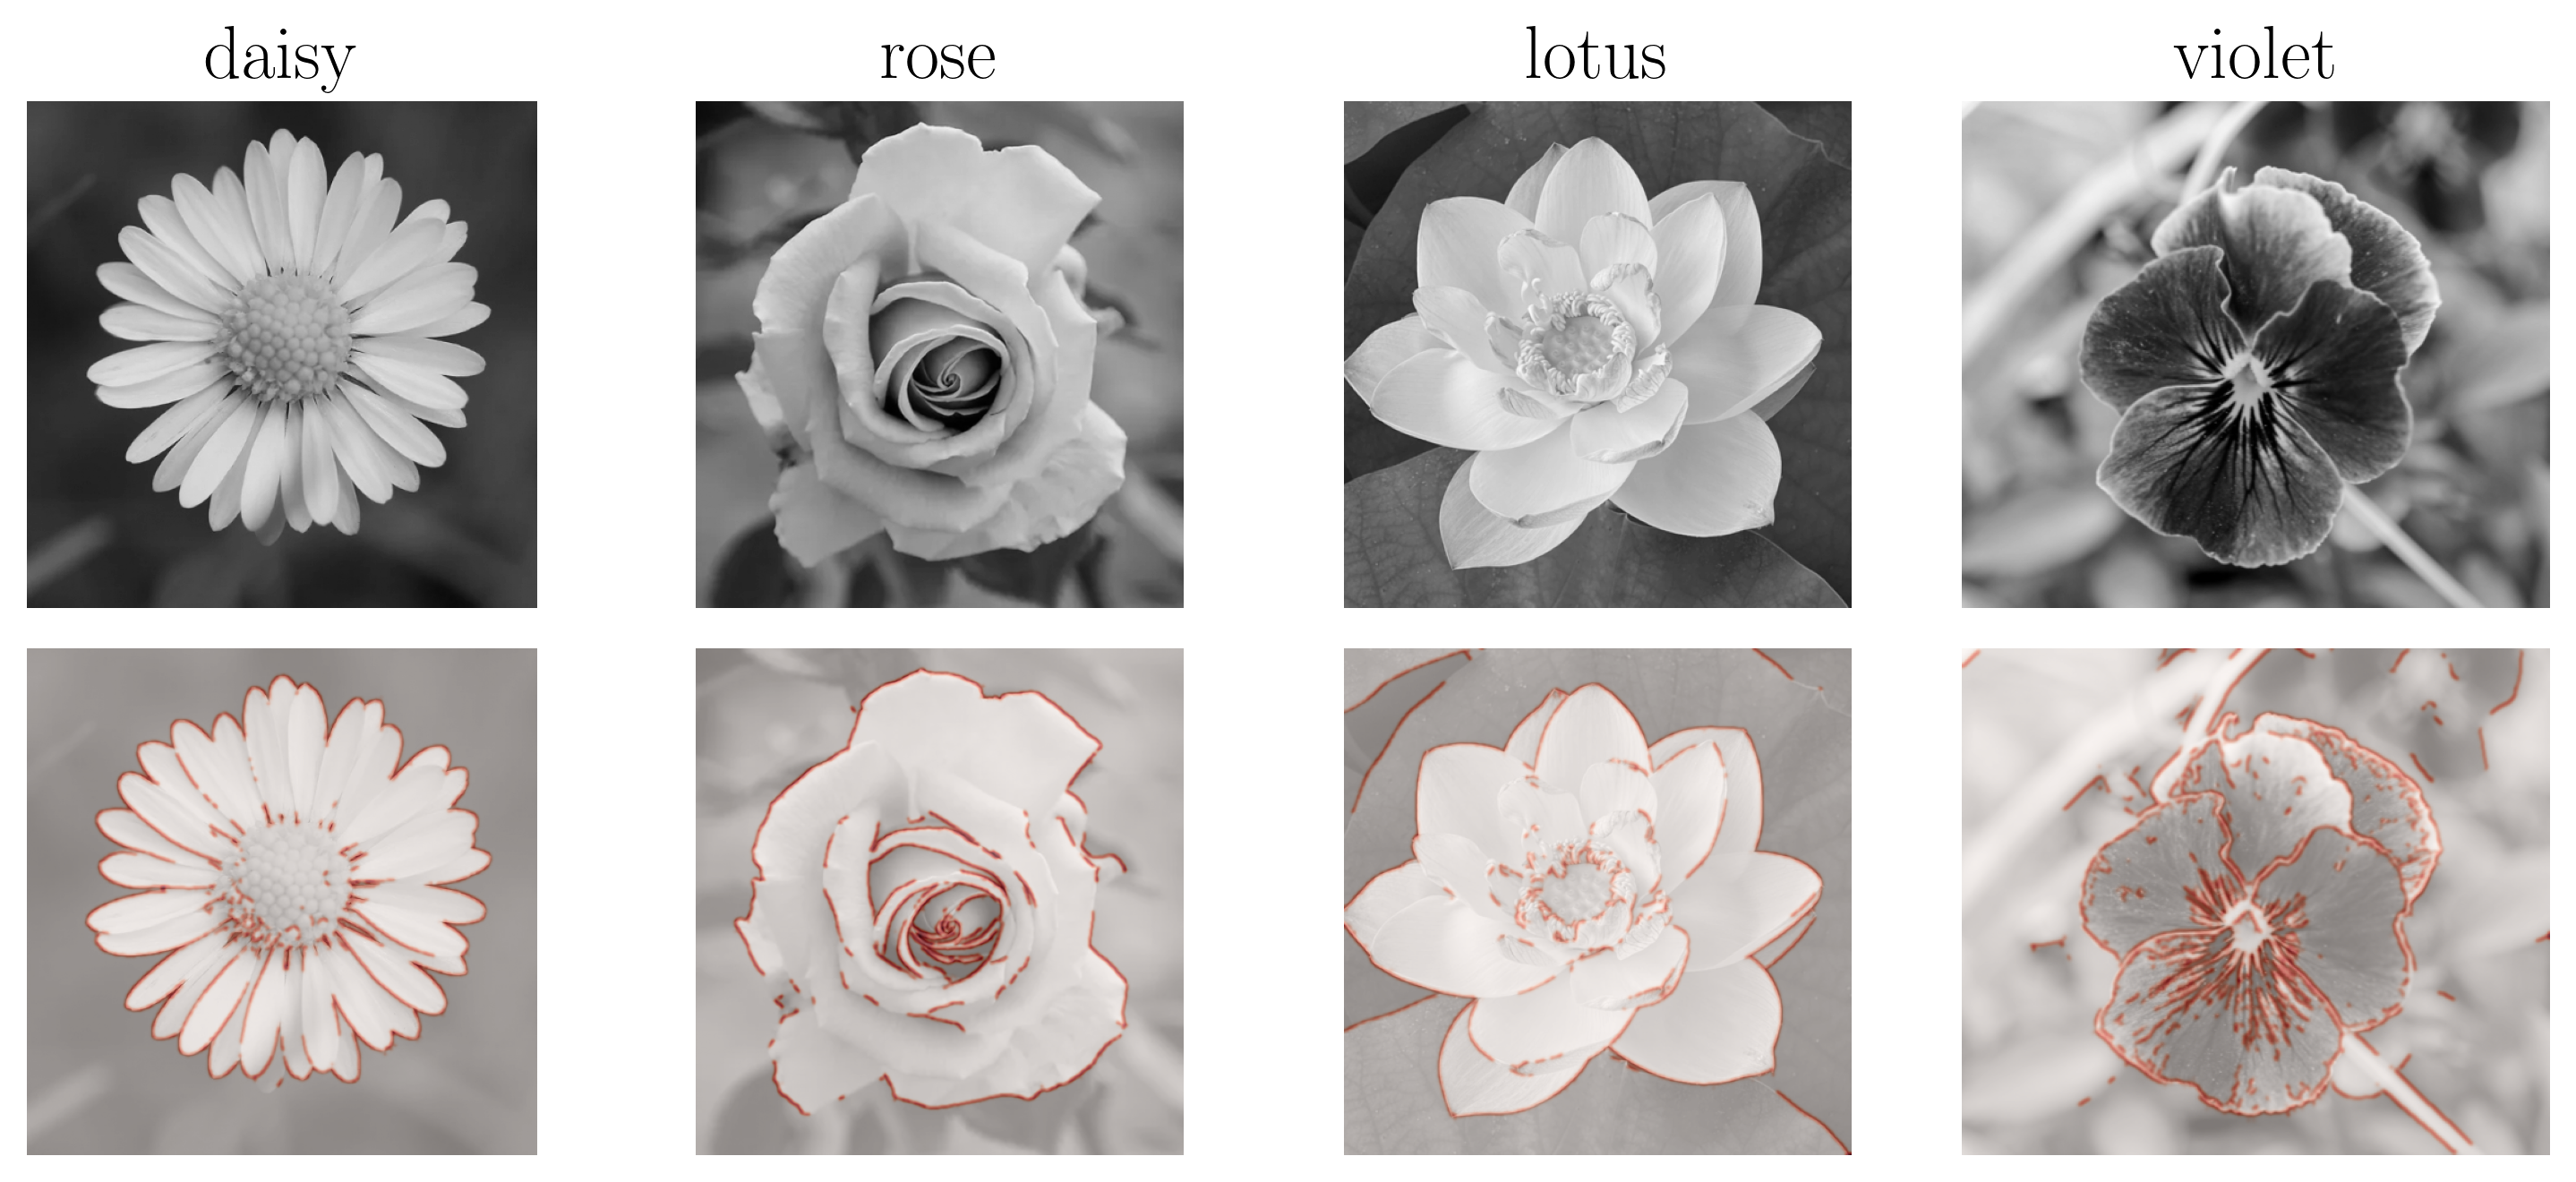

In [9]:
# Plotting the results
fig = plt.figure(figsize = (10,4.5), dpi = 300)

for i, j in enumerate(species):
    # Loading image
    I = cv2.imread(f"demo_images/{j}.png", cv2.IMREAD_GRAYSCALE)

    # Running proposed implementation of the model
    start = time.time()
    model = canny(sigma=sigma, t_lo=t_lo, t_hi=t_hi)
    E = model.fit_predict(I)
    print(f'[Image {i}] Computation time: {time.time() - start:.2} (s)')
    
    # For visibility purposes only : thickening edges by a convolution with a cross kernel (5 iterations)
    E = model._thicken(E,n = 5)

    # Plotting
    ax = fig.add_subplot(2,len(species),i+1)
    ax.imshow(I, vmin = 0, vmax = 255, cmap = 'gray', alpha = 1)
    ax.set_title(fr'{j}', fontsize = 20)
    ax.axis('off')

    ax = fig.add_subplot(2,len(species),i+1+4)
    ax.imshow(I, vmin=0, vmax=255, cmap='gray', alpha=1)
    ax.imshow(E, vmin = 0, vmax = 1, cmap = 'Reds', alpha = .5)
    ax.axis('off')

plt.tight_layout()
plt.show()

As you can see, the model does a pretty good job at drawing edges around the provided images!
\
\
**Note 1**: Note that model parameters were kept fixed throughout. In an ideal case, you would be tweaking standard deviation, width, and hysteresis thresholds to reach the targeted result.
\
\
**Note 2**: Realistically, the edges obtained from raw data will often be noisy and unusable. One should consider filtering the image using non-linear, edge-preserving filters to emphasize high-gradient regions and smooth the homogeneous background. In this case, I handpicked good quality images to simplify the process.